In [21]:
#Importing the required modules and general setup
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from galpy.util.bovy_coords import *
from search_local import *

In [22]:
data1 = search_phase_space(0., 0., 0., 0., 0., 0., 0.2, 0.)
data2 = search_phase_space(0., 0., 0., 0., 0., 0., 0.5, 0.)
data3 = search_phase_space(0., 0., 0., 0., 0., 0., 1.0, 0.)
data4 = search_phase_space(0., 0., 0., 0., 0., 0., 2.0, 0.)
data5 = search_phase_space(0., 0., 0., 0., 0., 0., 3.0, 0.)
data6 = search_phase_space(0., 0., 0., 0., 0., 0., 4.0, 0.)
data7 = get_entire_catalogue()

In [23]:
#Importing the required modules
import numpy as np
from sklearn.neighbors import KernelDensity

#Defining a KDE function to quickly compute probabilities for the data set
def generate_KDE(inputs, ker):
    """
    NAME:
        generate_KDE
    
    PURPOSE:
        Given an NxM matrix for inputs and one of six avaliable ker strings, 
        outputs a function `input_DKE` that treats the density estimate as a 
        black box function that can be sampled.
    
    INPUT:
        inputs (ndarray) = An NxM matrix where N is the number of data 
                           points and M is the number of parameters.
        ker (string) = One of the 6 avaliable kernel types (gaussian, 
                       tophat, epanechnikov, exponential, linear, cosine).
    
    OUTPUT:
        input_KDE (function) = A blackbox function for the density estimate
                               used for sampling data.
                               
    HISTORY:
        2018-07-15 - Updated - Ayush Pandhi
    """
    #Scaling velocities with z-score
    inputs_std = np.nanstd(inputs, axis=0)
    i1, i2, i3, i4, i5, i6 = np.mean(inputs, axis=0)
    inputs_mean = np.hstack((i1, i2, i3, i4, i5, i6))
    inputs = (inputs - inputs_mean)/inputs_std
    
    #Optimizing bandwidth in terms of Scott's Multivariate Rule of Thumb
    shape_string = str(inputs.shape)
    objects, parameters = shape_string.split(', ')
    N_string = objects[1:]
    N = int(N_string)
    bw = 5 * np.nanstd(inputs) * N ** (-1/10.)
    
    #Fit data points to selected kernel and bandwidth
    kde = KernelDensity(kernel=ker, bandwidth=bw).fit(inputs)  
    
    def input_KDE(samples):
        """
        NAME:
            input_KDE
    
        PURPOSE:
            Given a QxM matrix for samples, evaluates the blackbox density
            estimate function at those points to output a 1xQ array of 
            density values.
    
        INPUT:
            samples (ndarray) = A QxM matrix where Q is the number of points 
                                at which the kde is being evaluated and M is 
                                the number of parameters.
                                
        OUTPUT:
            dens (ndarray) = A 1xQ array of density values for Q data points.
                               
        HISTORY:
            2018-07-15 - Updated - Ayush Pandhi
        """
        #To correct the type of information from other functions into acceptable input
        #samples = np.array([samples])
        
        #Scaling samples with standard deviation
        samples = (samples - inputs_mean)/inputs_std
        
        #Get the log density for selected samples and apply exponential to get normal probabilities
        log_dens = kde.score_samples(samples)
        dens = np.exp(log_dens)
        
        #Return a 1xQ array of normal probabilities for the selected sample
        return dens
    
    #Return a black box function for sampling
    return input_KDE

In [25]:
#Generate kde for 6D qdf inputs
kde1 = generate_KDE(data1, 'epanechnikov')
kde2 = generate_KDE(data2, 'epanechnikov')
kde3 = generate_KDE(data3, 'epanechnikov')
kde4 = generate_KDE(data4, 'epanechnikov')
kde5 = generate_KDE(data5, 'epanechnikov')
kde6 = generate_KDE(data6, 'epanechnikov')
kde7 = generate_KDE(data7, 'epanechnikov')

Epsilon set to 200pc kpc
Variable x at Scotts bw


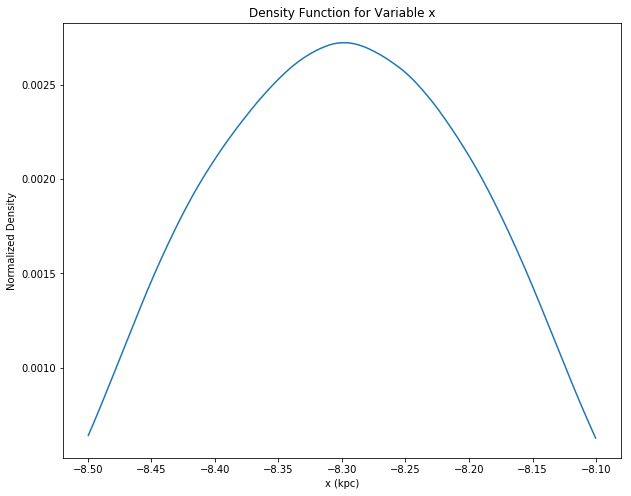

Variable y at Scotts bw


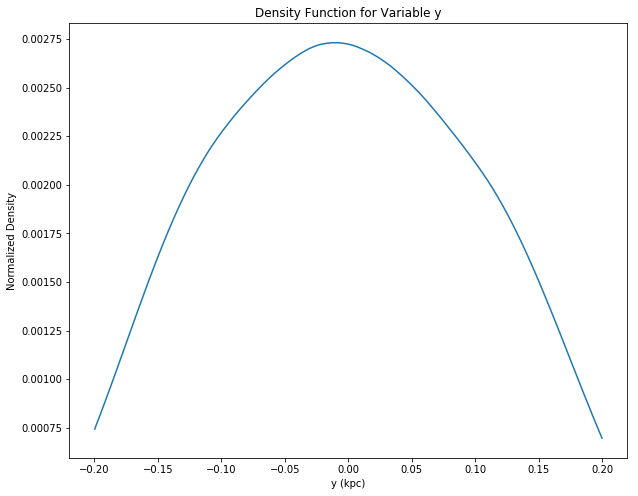

Variable z at Scotts bw


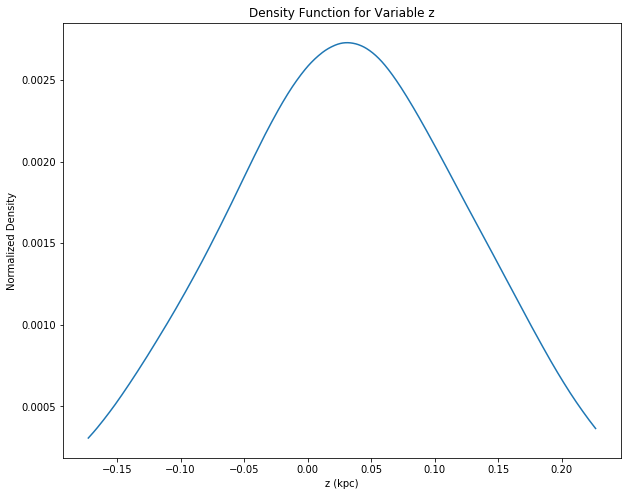

Variable vx at Scotts bw


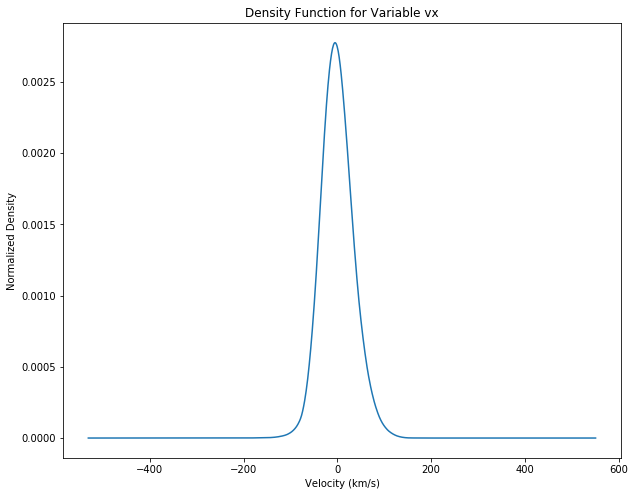

Variable vy at Scotts bw


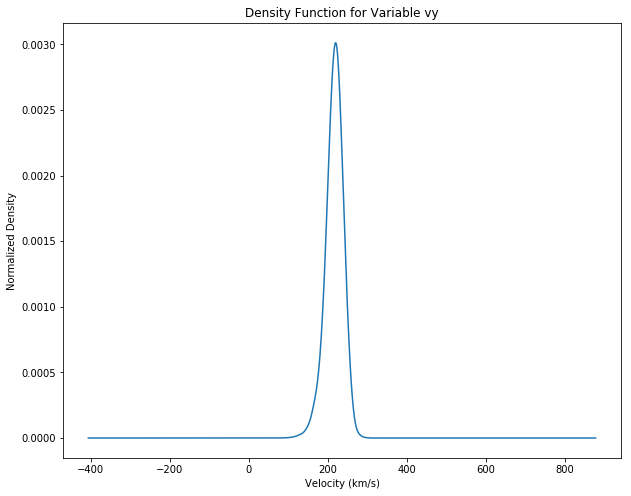

Variable vz at Scotts bw


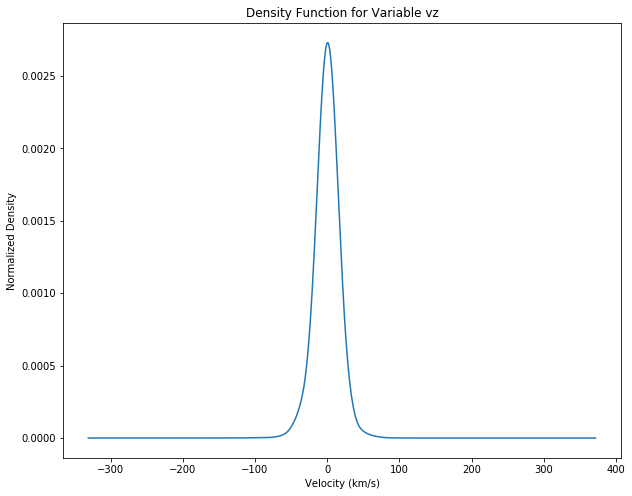

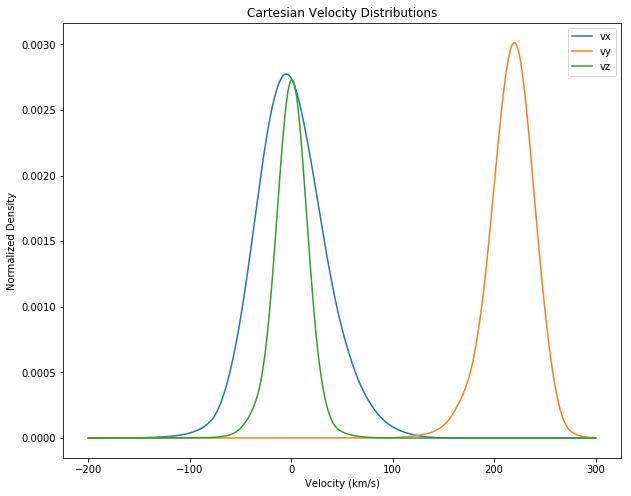

In [31]:
#Creating sample points for each parameter changing
N = 1000

#Mean of each parameter as a Nx1 object
mean_x = np.ones((N, 1))*np.mean(data1[:,0])
mean_y = np.ones((N, 1))*np.mean(data1[:,1])
mean_z = np.ones((N, 1))*np.mean(data1[:,2])
mean_vx = np.ones((N, 1))*np.mean(data1[:,3])
mean_vy = np.ones((N, 1))*np.mean(data1[:,4])
mean_vz = np.ones((N, 1))*np.mean(data1[:,5])

#Generating Nx6 sample points for each varying parameter
#For variable R
x_points = np.linspace(min(data1[:,0]), max(data1[:,0]), N)
x_points = x_points.reshape(-1, 1)
sample_x = np.hstack((x_points, mean_y, mean_z, mean_vx, mean_vy, mean_vz))

#For variable y
y_points = np.linspace(min(data1[:,1]), max(data1[:,1]), N)
y_points = y_points.reshape(-1, 1)
sample_y = np.hstack((mean_x, y_points, mean_z, mean_vx, mean_vy, mean_vz))
                 
#For variable z
z_points = np.linspace(min(data1[:,2]), max(data1[:,2]), N)
z_points = z_points.reshape(-1, 1)
sample_z = np.hstack((mean_x, mean_y, z_points, mean_vx, mean_vy, mean_vz))
                 
#For variable vx
vx_points = np.linspace(min(data1[:,3]), max(data1[:,3]), N)
vx_points = vx_points.reshape(-1, 1)
sample_vx = np.hstack((mean_x, mean_y, mean_z, vx_points, mean_vy, mean_vz))

#For variable vy
vy_points = np.linspace(min(data1[:,4]), max(data1[:,4]), N)
vy_points = vy_points.reshape(-1, 1)
sample_vy = np.hstack((mean_x, mean_y, mean_z, mean_vx, vy_points, mean_vz))
                 
#For variable vz
vz_points = np.linspace(min(data1[:,5]), max(data1[:,5]), N)
vz_points = vz_points.reshape(-1, 1)
sample_vz = np.hstack((mean_x, mean_y, mean_z, mean_vx, mean_vy, vz_points))


#Plots for epsilon = 200pckpc
print('Epsilon set to 200pc kpc')

#Variable x plot
print('Variable x at Scotts bw')
plt.figure(figsize = (10, 8))
xplot_epanechnikov = kde1(sample_x)
plt.plot(x_points, xplot_epanechnikov)
plt.xlabel('x (kpc)')
plt.ylabel('Normalized Density')
plt.title('Density Function for Variable x')
plt.savefig('zscore_cart_variable_x_ep200pc')
plt.show()

#Variable y plot
print('Variable y at Scotts bw')
plt.figure(figsize = (10, 8))
yplot_epanechnikov = kde1(sample_y)
plt.plot(y_points, yplot_epanechnikov)
plt.xlabel('y (kpc)')
plt.ylabel('Normalized Density')
plt.title('Density Function for Variable y')
plt.savefig('zscore_cart_variable_y_ep200pc')
plt.show()

#Variable z plot
print('Variable z at Scotts bw')
plt.figure(figsize = (10, 8))
zplot_epanechnikov = kde1(sample_z)
plt.plot(z_points, zplot_epanechnikov)
plt.xlabel('z (kpc)')
plt.ylabel('Normalized Density')
plt.title('Density Function for Variable z')
plt.savefig('zscore_cart_variable_z_ep200pc')
plt.show()

#Variable vx plot
print('Variable vx at Scotts bw')
plt.figure(figsize = (10, 8))
vxplot_epanechnikov = kde1(sample_vx)
plt.plot(vx_points, vxplot_epanechnikov)
plt.xlabel('Velocity (km/s)')
plt.ylabel('Normalized Density')
plt.title('Density Function for Variable vx')
plt.savefig('zscore_cart_variable_vx_ep200pc')
plt.show()

#Variable vy plot
print('Variable vy at Scotts bw')
plt.figure(figsize = (10, 8))
vyplot_epanechnikov = kde1(sample_vy)
plt.plot(vy_points, vyplot_epanechnikov)
plt.xlabel('Velocity (km/s)')
plt.ylabel('Normalized Density')
plt.title('Density Function for Variable vy')
plt.savefig('zscore_cart_variable_vy_ep200pc')
plt.show()

#Variable vz plot
print('Variable vz at Scotts bw')
plt.figure(figsize = (10, 8))
vzplot_epanechnikov = kde1(sample_vz)
plt.plot(vz_points, vzplot_epanechnikov)
plt.xlabel('Velocity (km/s)')
plt.ylabel('Normalized Density')
plt.title('Density Function for Variable vz')
plt.savefig('zscore_cart_variable_vz_ep200pc')
plt.show()

#For variable vx
vx_points = np.linspace(-200, 300, N)
vx_points = vx_points.reshape(-1, 1)
sample_vx = np.hstack((mean_x, mean_y, mean_z, vx_points, mean_vy, mean_vz))

#For variable vy
vy_points = np.linspace(-200, 300, N)
vy_points = vy_points.reshape(-1, 1)
sample_vy = np.hstack((mean_x, mean_y, mean_z, mean_vx, vy_points, mean_vz))
                 
#For variable vz
vz_points = np.linspace(-200, 300, N)
vz_points = vz_points.reshape(-1, 1)
sample_vz = np.hstack((mean_x, mean_y, mean_z, mean_vx, mean_vy, vz_points))

#Overplotting velocities
plt.figure(figsize = (10, 8))

#Epanechnikov, vx, Scotts
vxplot_epanechnikov = kde1(sample_vx)
plt.plot(vx_points, vxplot_epanechnikov, label='vx')

#Epanechnikov, vy, Scotts
vyplot_epanechnikov = kde1(sample_vy)
plt.plot(vy_points, vyplot_epanechnikov, label='vy')

#Epanechnikov, vz, Scotts
vzplot_epanechnikov = kde1(sample_vz)
plt.plot(vz_points, vzplot_epanechnikov, label='vz')

#Show plot
plt.xlabel('Velocity (km/s)')
plt.ylabel('Normalized Density')
plt.title('Cartesian Velocity Distributions')
plt.legend()
plt.savefig('zscore_cart_velocity_distribution_ep200pc')
plt.show()

Epsilon set to 0.5 kpc
Variable x at Scotts bw


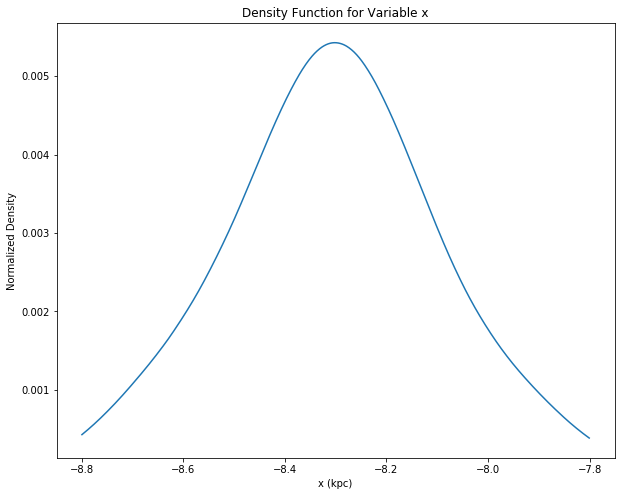

Variable y at Scotts bw


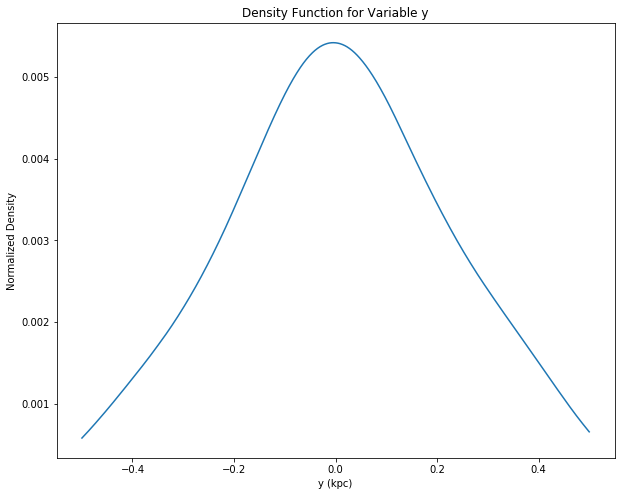

Variable z at Scotts bw


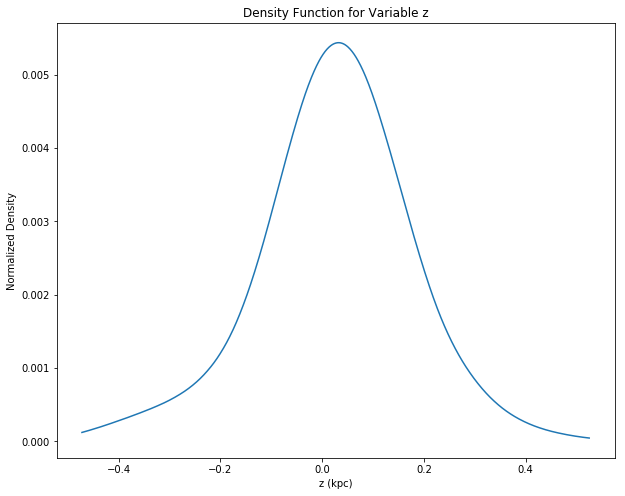

Variable vx at Scotts bw


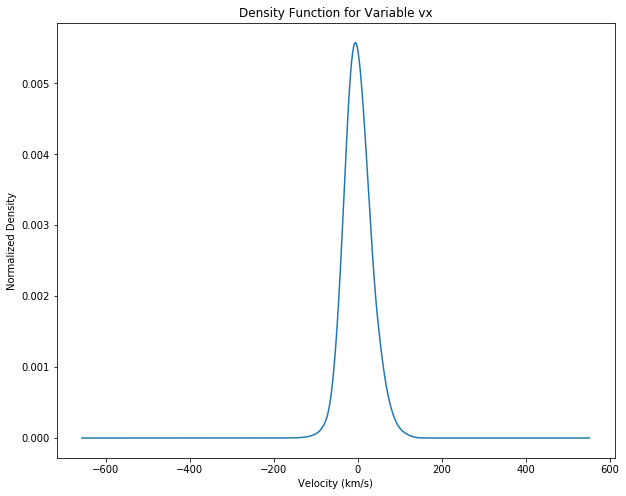

Variable vy at Scotts bw


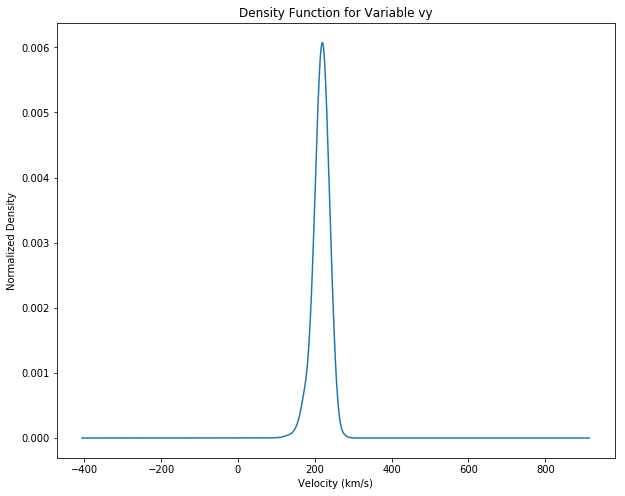

Variable vz at Scotts bw


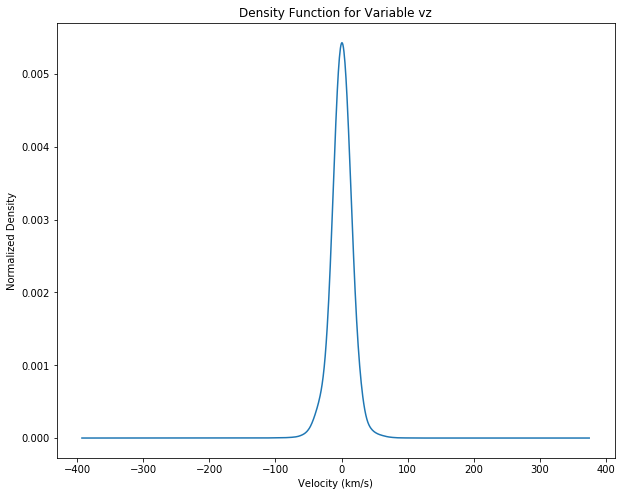

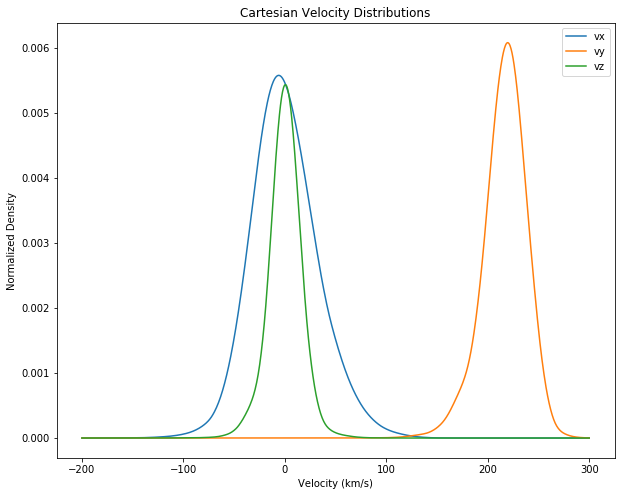

In [32]:
#Creating sample points for each parameter changing
N = 1000

#Mean of each parameter as a Nx1 object
mean_x = np.ones((N, 1))*np.mean(data2[:,0])
mean_y = np.ones((N, 1))*np.mean(data2[:,1])
mean_z = np.ones((N, 1))*np.mean(data2[:,2])
mean_vx = np.ones((N, 1))*np.mean(data2[:,3])
mean_vy = np.ones((N, 1))*np.mean(data2[:,4])
mean_vz = np.ones((N, 1))*np.mean(data2[:,5])

#Generating Nx6 sample points for each varying parameter
#For variable R
x_points = np.linspace(min(data2[:,0]), max(data2[:,0]), N)
x_points = x_points.reshape(-1, 1)
sample_x = np.hstack((x_points, mean_y, mean_z, mean_vx, mean_vy, mean_vz))

#For variable y
y_points = np.linspace(min(data2[:,1]), max(data2[:,1]), N)
y_points = y_points.reshape(-1, 1)
sample_y = np.hstack((mean_x, y_points, mean_z, mean_vx, mean_vy, mean_vz))
                 
#For variable z
z_points = np.linspace(min(data2[:,2]), max(data2[:,2]), N)
z_points = z_points.reshape(-1, 1)
sample_z = np.hstack((mean_x, mean_y, z_points, mean_vx, mean_vy, mean_vz))
                 
#For variable vx
vx_points = np.linspace(min(data2[:,3]), max(data2[:,3]), N)
vx_points = vx_points.reshape(-1, 1)
sample_vx = np.hstack((mean_x, mean_y, mean_z, vx_points, mean_vy, mean_vz))

#For variable vy
vy_points = np.linspace(min(data2[:,4]), max(data2[:,4]), N)
vy_points = vy_points.reshape(-1, 1)
sample_vy = np.hstack((mean_x, mean_y, mean_z, mean_vx, vy_points, mean_vz))
                 
#For variable vz
vz_points = np.linspace(min(data2[:,5]), max(data2[:,5]), N)
vz_points = vz_points.reshape(-1, 1)
sample_vz = np.hstack((mean_x, mean_y, mean_z, mean_vx, mean_vy, vz_points))

#Plots for epsilon = 0.5 kpc
print('Epsilon set to 0.5 kpc')

#Variable x plot
print('Variable x at Scotts bw')
plt.figure(figsize = (10, 8))
xplot_epanechnikov = kde2(sample_x)
plt.plot(x_points, xplot_epanechnikov)
plt.xlabel('x (kpc)')
plt.ylabel('Normalized Density')
plt.title('Density Function for Variable x')
plt.savefig('zscore_cart_variable_x_ep500pc')
plt.show()

#Variable y plot
print('Variable y at Scotts bw')
plt.figure(figsize = (10, 8))
yplot_epanechnikov = kde2(sample_y)
plt.plot(y_points, yplot_epanechnikov)
plt.xlabel('y (kpc)')
plt.ylabel('Normalized Density')
plt.title('Density Function for Variable y')
plt.savefig('zscore_cart_variable_y_ep500pc')
plt.show()

#Variable z plot
print('Variable z at Scotts bw')
plt.figure(figsize = (10, 8))
zplot_epanechnikov = kde2(sample_z)
plt.plot(z_points, zplot_epanechnikov)
plt.xlabel('z (kpc)')
plt.ylabel('Normalized Density')
plt.title('Density Function for Variable z')
plt.savefig('zscore_cart_variable_z_ep500pc')
plt.show()

#Variable vx plot
print('Variable vx at Scotts bw')
plt.figure(figsize = (10, 8))
vxplot_epanechnikov = kde2(sample_vx)
plt.plot(vx_points, vxplot_epanechnikov)
plt.xlabel('Velocity (km/s)')
plt.ylabel('Normalized Density')
plt.title('Density Function for Variable vx')
plt.savefig('zscore_cart_variable_vx_ep500pc')
plt.show()

#Variable vy plot
print('Variable vy at Scotts bw')
plt.figure(figsize = (10, 8))
vyplot_epanechnikov = kde2(sample_vy)
plt.plot(vy_points, vyplot_epanechnikov)
plt.xlabel('Velocity (km/s)')
plt.ylabel('Normalized Density')
plt.title('Density Function for Variable vy')
plt.savefig('zscore_cart_variable_vy_ep500pc')
plt.show()

#Variable vz plot
print('Variable vz at Scotts bw')
plt.figure(figsize = (10, 8))
vzplot_epanechnikov = kde2(sample_vz)
plt.plot(vz_points, vzplot_epanechnikov)
plt.xlabel('Velocity (km/s)')
plt.ylabel('Normalized Density')
plt.title('Density Function for Variable vz')
plt.savefig('zscore_cart_variable_vz_ep500pc')
plt.show()

#For variable vx
vx_points = np.linspace(-200, 300, N)
vx_points = vx_points.reshape(-1, 1)
sample_vx = np.hstack((mean_x, mean_y, mean_z, vx_points, mean_vy, mean_vz))

#For variable vy
vy_points = np.linspace(-200, 300, N)
vy_points = vy_points.reshape(-1, 1)
sample_vy = np.hstack((mean_x, mean_y, mean_z, mean_vx, vy_points, mean_vz))
                 
#For variable vz
vz_points = np.linspace(-200, 300, N)
vz_points = vz_points.reshape(-1, 1)
sample_vz = np.hstack((mean_x, mean_y, mean_z, mean_vx, mean_vy, vz_points))

#Overplotting velocities
plt.figure(figsize = (10, 8))

#Epanechnikov, vx, Scotts
vxplot_epanechnikov = kde2(sample_vx)
plt.plot(vx_points, vxplot_epanechnikov, label='vx')

#Epanechnikov, vy, Scotts
vyplot_epanechnikov = kde2(sample_vy)
plt.plot(vy_points, vyplot_epanechnikov, label='vy')

#Epanechnikov, vz, Scotts
vzplot_epanechnikov = kde2(sample_vz)
plt.plot(vz_points, vzplot_epanechnikov, label='vz')

#Show plot
plt.xlabel('Velocity (km/s)')
plt.ylabel('Normalized Density')
plt.title('Cartesian Velocity Distributions')
plt.legend()
plt.savefig('zscore_cart_velocity_distribution_ep500pc')
plt.show()

Epsilon set to 1.0 kpc
Variable x at Scotts bw


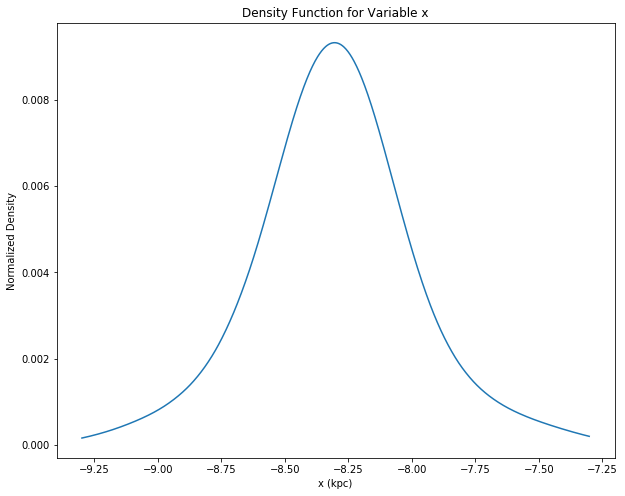

Variable y at Scotts bw


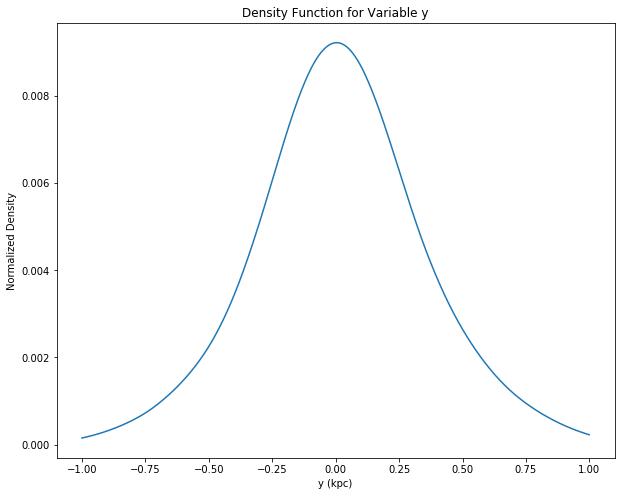

Variable z at Scotts bw


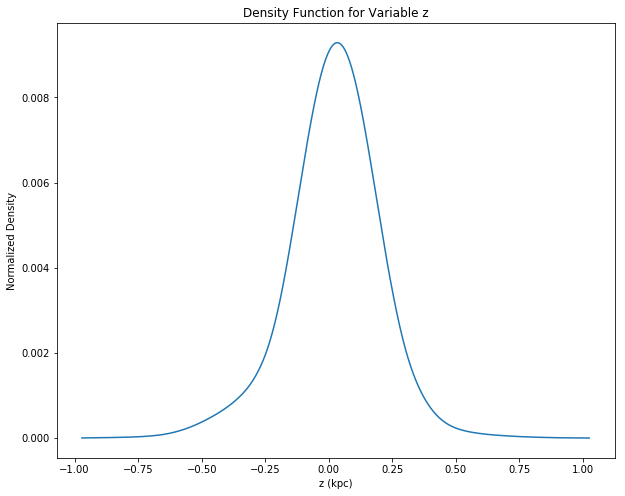

Variable vx at Scotts bw


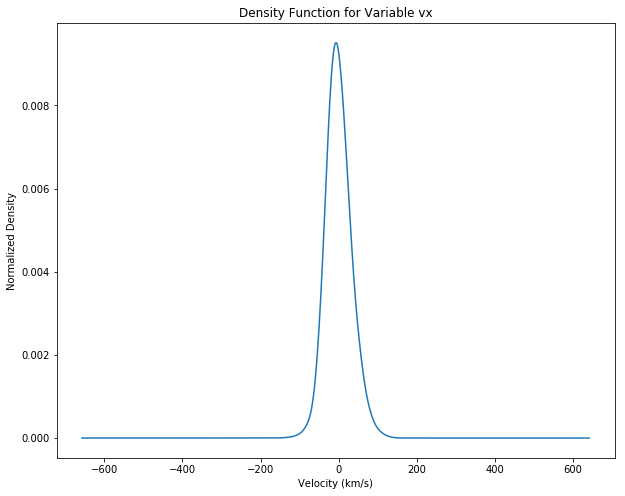

Variable vy at Scotts bw


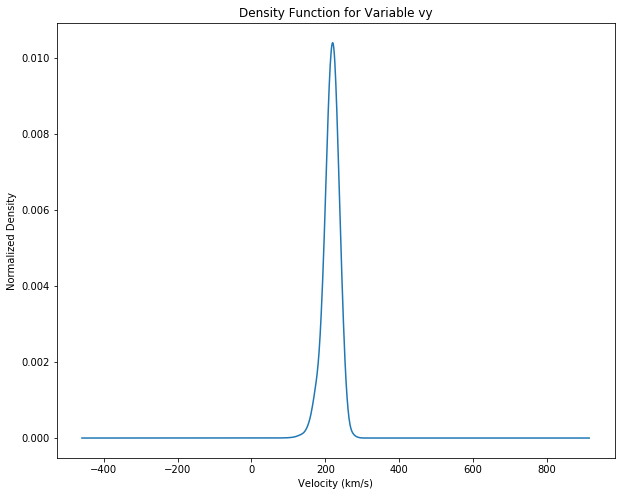

Variable vz at Scotts bw


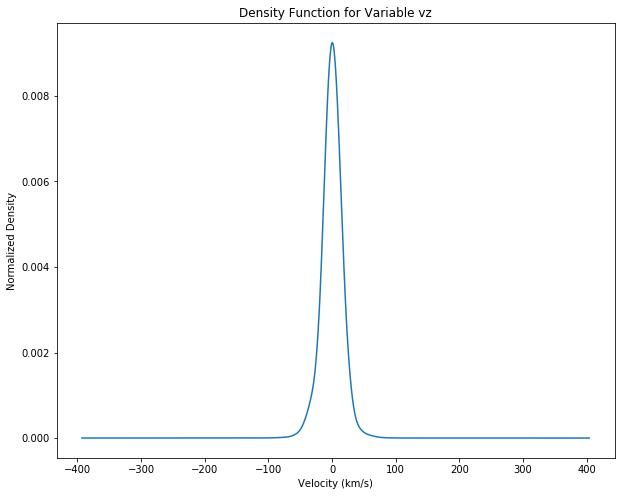

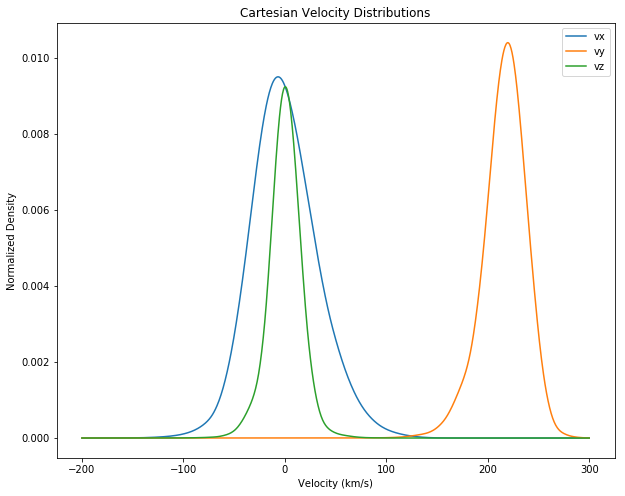

In [33]:
#Creating sample points for each parameter changing
N = 1000

#Mean of each parameter as a Nx1 object
mean_x = np.ones((N, 1))*np.mean(data3[:,0])
mean_y = np.ones((N, 1))*np.mean(data3[:,1])
mean_z = np.ones((N, 1))*np.mean(data3[:,2])
mean_vx = np.ones((N, 1))*np.mean(data3[:,3])
mean_vy = np.ones((N, 1))*np.mean(data3[:,4])
mean_vz = np.ones((N, 1))*np.mean(data3[:,5])

#Generating Nx6 sample points for each varying parameter
#For variable R
x_points = np.linspace(min(data3[:,0]), max(data3[:,0]), N)
x_points = x_points.reshape(-1, 1)
sample_x = np.hstack((x_points, mean_y, mean_z, mean_vx, mean_vy, mean_vz))

#For variable y
y_points = np.linspace(min(data3[:,1]), max(data3[:,1]), N)
y_points = y_points.reshape(-1, 1)
sample_y = np.hstack((mean_x, y_points, mean_z, mean_vx, mean_vy, mean_vz))
                 
#For variable z
z_points = np.linspace(min(data3[:,2]), max(data3[:,2]), N)
z_points = z_points.reshape(-1, 1)
sample_z = np.hstack((mean_x, mean_y, z_points, mean_vx, mean_vy, mean_vz))
                 
#For variable vx
vx_points = np.linspace(min(data3[:,3]), max(data3[:,3]), N)
vx_points = vx_points.reshape(-1, 1)
sample_vx = np.hstack((mean_x, mean_y, mean_z, vx_points, mean_vy, mean_vz))

#For variable vy
vy_points = np.linspace(min(data3[:,4]), max(data3[:,4]), N)
vy_points = vy_points.reshape(-1, 1)
sample_vy = np.hstack((mean_x, mean_y, mean_z, mean_vx, vy_points, mean_vz))
                 
#For variable vz
vz_points = np.linspace(min(data3[:,5]), max(data3[:,5]), N)
vz_points = vz_points.reshape(-1, 1)
sample_vz = np.hstack((mean_x, mean_y, mean_z, mean_vx, mean_vy, vz_points))

#Plots for epsilon = 1.0 kpc
print('Epsilon set to 1.0 kpc')

#Variable x plot
print('Variable x at Scotts bw')
plt.figure(figsize = (10, 8))
xplot_epanechnikov = kde3(sample_x)
plt.plot(x_points, xplot_epanechnikov)
plt.xlabel('x (kpc)')
plt.ylabel('Normalized Density')
plt.title('Density Function for Variable x')
plt.savefig('zscore_cart_variable_x_ep1kpc')
plt.show()

#Variable y plot
print('Variable y at Scotts bw')
plt.figure(figsize = (10, 8))
yplot_epanechnikov = kde3(sample_y)
plt.plot(y_points, yplot_epanechnikov)
plt.xlabel('y (kpc)')
plt.ylabel('Normalized Density')
plt.title('Density Function for Variable y')
plt.savefig('zscore_cart_variable_y_ep1kpc')
plt.show()

#Variable z plot
print('Variable z at Scotts bw')
plt.figure(figsize = (10, 8))
zplot_epanechnikov = kde3(sample_z)
plt.plot(z_points, zplot_epanechnikov)
plt.xlabel('z (kpc)')
plt.ylabel('Normalized Density')
plt.title('Density Function for Variable z')
plt.savefig('zscore_cart_variable_z_ep1kpc')
plt.show()

#Variable vx plot
print('Variable vx at Scotts bw')
plt.figure(figsize = (10, 8))
vxplot_epanechnikov = kde3(sample_vx)
plt.plot(vx_points, vxplot_epanechnikov)
plt.xlabel('Velocity (km/s)')
plt.ylabel('Normalized Density')
plt.title('Density Function for Variable vx')
plt.savefig('zscore_cart_variable_vx_ep1kpc')
plt.show()

#Variable vy plot
print('Variable vy at Scotts bw')
plt.figure(figsize = (10, 8))
vyplot_epanechnikov = kde3(sample_vy)
plt.plot(vy_points, vyplot_epanechnikov)
plt.xlabel('Velocity (km/s)')
plt.ylabel('Normalized Density')
plt.title('Density Function for Variable vy')
plt.savefig('zscore_cart_variable_vy_ep1kpc')
plt.show()

#Variable vz plot
print('Variable vz at Scotts bw')
plt.figure(figsize = (10, 8))
vzplot_epanechnikov = kde3(sample_vz)
plt.plot(vz_points, vzplot_epanechnikov)
plt.xlabel('Velocity (km/s)')
plt.ylabel('Normalized Density')
plt.title('Density Function for Variable vz')
plt.savefig('zscore_cart_variable_vz_ep1kpc')
plt.show()

#For variable vx
vx_points = np.linspace(-200, 300, N)
vx_points = vx_points.reshape(-1, 1)
sample_vx = np.hstack((mean_x, mean_y, mean_z, vx_points, mean_vy, mean_vz))

#For variable vy
vy_points = np.linspace(-200, 300, N)
vy_points = vy_points.reshape(-1, 1)
sample_vy = np.hstack((mean_x, mean_y, mean_z, mean_vx, vy_points, mean_vz))
                 
#For variable vz
vz_points = np.linspace(-200, 300, N)
vz_points = vz_points.reshape(-1, 1)
sample_vz = np.hstack((mean_x, mean_y, mean_z, mean_vx, mean_vy, vz_points))

#Overplotting velocities
plt.figure(figsize = (10, 8))

#Epanechnikov, vx, Scotts
vxplot_epanechnikov = kde3(sample_vx)
plt.plot(vx_points, vxplot_epanechnikov, label='vx')

#Epanechnikov, vy, Scotts
vyplot_epanechnikov = kde3(sample_vy)
plt.plot(vy_points, vyplot_epanechnikov, label='vy')

#Epanechnikov, vz, Scotts
vzplot_epanechnikov = kde3(sample_vz)
plt.plot(vz_points, vzplot_epanechnikov, label='vz')

#Show plot
plt.xlabel('Velocity (km/s)')
plt.ylabel('Normalized Density')
plt.title('Cartesian Velocity Distributions')
plt.legend()
plt.savefig('zscore_cart_velocity_distribution_ep1kpc')
plt.show()

Epsilon set to 2.0 kpc
Variable x at Scotts bw


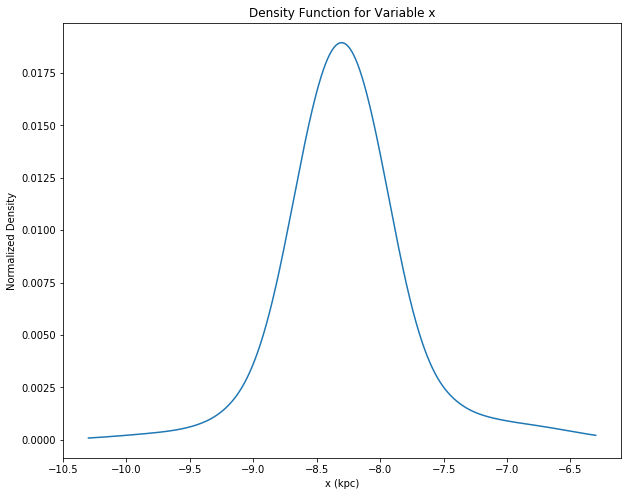

Variable y at Scotts bw


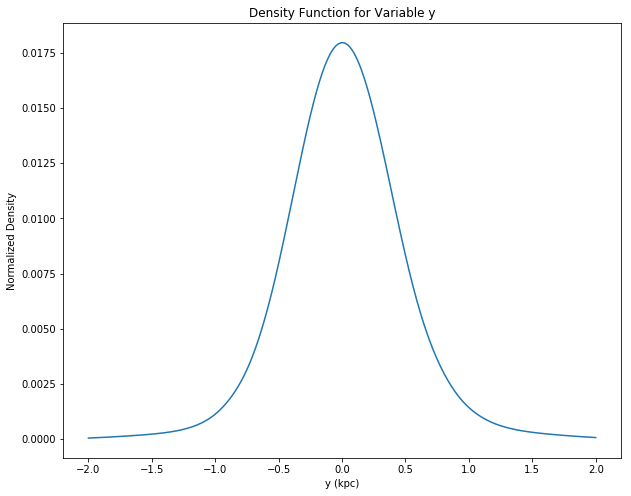

Variable z at Scotts bw


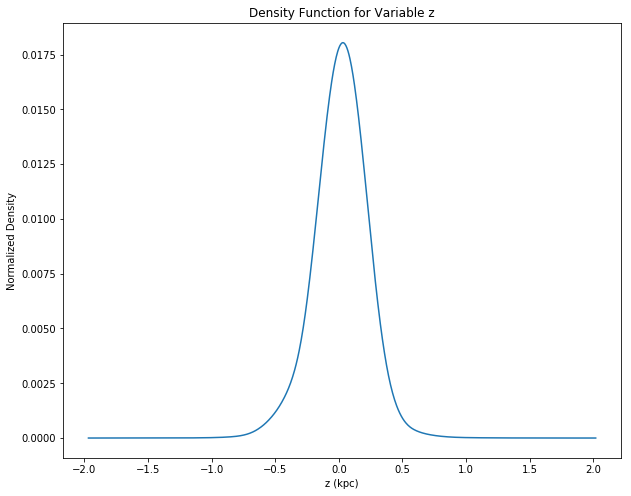

Variable vx at Scotts bw


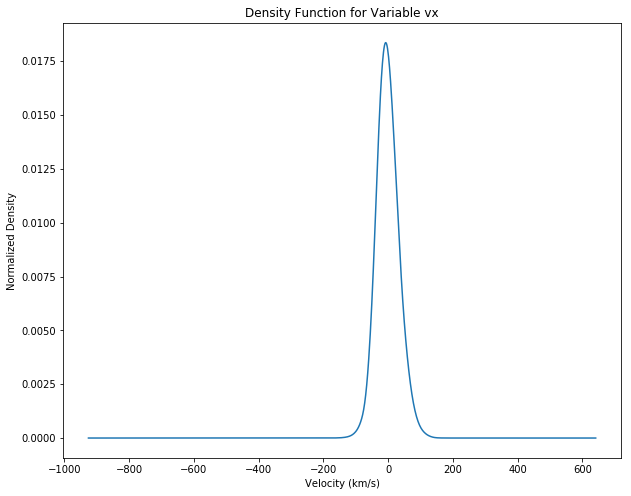

Variable vy at Scotts bw


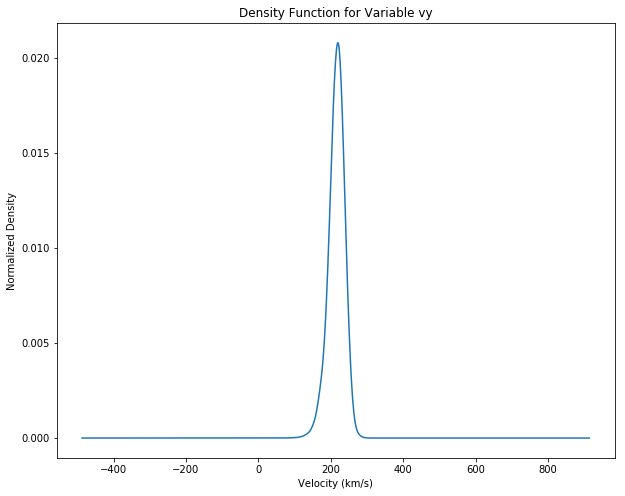

Variable vz at Scotts bw


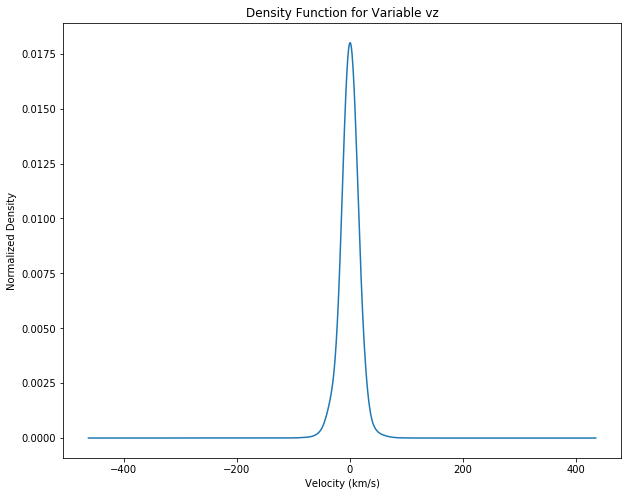

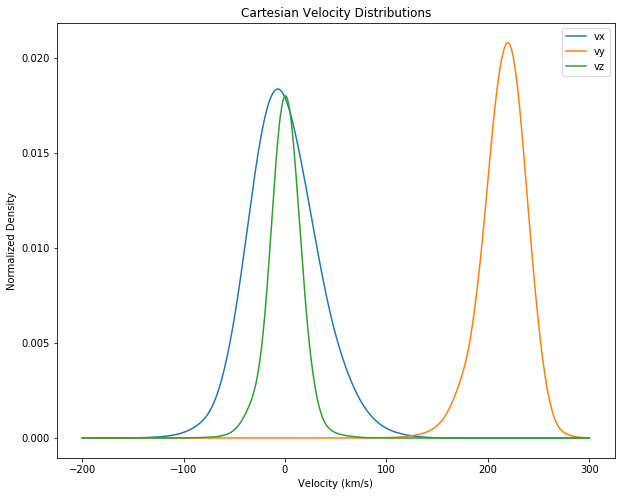

In [34]:
#Creating sample points for each parameter changing
N = 1000

#Mean of each parameter as a Nx1 object
mean_x = np.ones((N, 1))*np.mean(data4[:,0])
mean_y = np.ones((N, 1))*np.mean(data4[:,1])
mean_z = np.ones((N, 1))*np.mean(data4[:,2])
mean_vx = np.ones((N, 1))*np.mean(data4[:,3])
mean_vy = np.ones((N, 1))*np.mean(data4[:,4])
mean_vz = np.ones((N, 1))*np.mean(data4[:,5])

#Generating Nx6 sample points for each varying parameter
#For variable R
x_points = np.linspace(min(data4[:,0]), max(data4[:,0]), N)
x_points = x_points.reshape(-1, 1)
sample_x = np.hstack((x_points, mean_y, mean_z, mean_vx, mean_vy, mean_vz))

#For variable y
y_points = np.linspace(min(data4[:,1]), max(data4[:,1]), N)
y_points = y_points.reshape(-1, 1)
sample_y = np.hstack((mean_x, y_points, mean_z, mean_vx, mean_vy, mean_vz))
                 
#For variable z
z_points = np.linspace(min(data4[:,2]), max(data4[:,2]), N)
z_points = z_points.reshape(-1, 1)
sample_z = np.hstack((mean_x, mean_y, z_points, mean_vx, mean_vy, mean_vz))
                 
#For variable vx
vx_points = np.linspace(min(data4[:,3]), max(data4[:,3]), N)
vx_points = vx_points.reshape(-1, 1)
sample_vx = np.hstack((mean_x, mean_y, mean_z, vx_points, mean_vy, mean_vz))

#For variable vy
vy_points = np.linspace(min(data4[:,4]), max(data4[:,4]), N)
vy_points = vy_points.reshape(-1, 1)
sample_vy = np.hstack((mean_x, mean_y, mean_z, mean_vx, vy_points, mean_vz))
                 
#For variable vz
vz_points = np.linspace(min(data4[:,5]), max(data4[:,5]), N)
vz_points = vz_points.reshape(-1, 1)
sample_vz = np.hstack((mean_x, mean_y, mean_z, mean_vx, mean_vy, vz_points))

#Plots for epsilon = 2.0 kpc
print('Epsilon set to 2.0 kpc')

#Variable x plot
print('Variable x at Scotts bw')
plt.figure(figsize = (10, 8))
xplot_epanechnikov = kde4(sample_x)
plt.plot(x_points, xplot_epanechnikov)
plt.xlabel('x (kpc)')
plt.ylabel('Normalized Density')
plt.title('Density Function for Variable x')
plt.savefig('zscore_cart_variable_x_ep2kpc')
plt.show()

#Variable y plot
print('Variable y at Scotts bw')
plt.figure(figsize = (10, 8))
yplot_epanechnikov = kde4(sample_y)
plt.plot(y_points, yplot_epanechnikov)
plt.xlabel('y (kpc)')
plt.ylabel('Normalized Density')
plt.title('Density Function for Variable y')
plt.savefig('zscore_cart_variable_y_ep2kpc')
plt.show()

#Variable z plot
print('Variable z at Scotts bw')
plt.figure(figsize = (10, 8))
zplot_epanechnikov = kde4(sample_z)
plt.plot(z_points, zplot_epanechnikov)
plt.xlabel('z (kpc)')
plt.ylabel('Normalized Density')
plt.title('Density Function for Variable z')
plt.savefig('zscore_cart_variable_z_ep2kpc')
plt.show()

#Variable vx plot
print('Variable vx at Scotts bw')
plt.figure(figsize = (10, 8))
vxplot_epanechnikov = kde4(sample_vx)
plt.plot(vx_points, vxplot_epanechnikov)
plt.xlabel('Velocity (km/s)')
plt.ylabel('Normalized Density')
plt.title('Density Function for Variable vx')
plt.savefig('zscore_cart_variable_vx_ep2kpc')
plt.show()

#Variable vy plot
print('Variable vy at Scotts bw')
plt.figure(figsize = (10, 8))
vyplot_epanechnikov = kde4(sample_vy)
plt.plot(vy_points, vyplot_epanechnikov)
plt.xlabel('Velocity (km/s)')
plt.ylabel('Normalized Density')
plt.title('Density Function for Variable vy')
plt.savefig('zscore_cart_variable_vy_ep2kpc')
plt.show()

#Variable vz plot
print('Variable vz at Scotts bw')
plt.figure(figsize = (10, 8))
vzplot_epanechnikov = kde4(sample_vz)
plt.plot(vz_points, vzplot_epanechnikov)
plt.xlabel('Velocity (km/s)')
plt.ylabel('Normalized Density')
plt.title('Density Function for Variable vz')
plt.savefig('zscore_cart_variable_vz_ep2kpc')
plt.show()

#For variable vx
vx_points = np.linspace(-200, 300, N)
vx_points = vx_points.reshape(-1, 1)
sample_vx = np.hstack((mean_x, mean_y, mean_z, vx_points, mean_vy, mean_vz))

#For variable vy
vy_points = np.linspace(-200, 300, N)
vy_points = vy_points.reshape(-1, 1)
sample_vy = np.hstack((mean_x, mean_y, mean_z, mean_vx, vy_points, mean_vz))
                 
#For variable vz
vz_points = np.linspace(-200, 300, N)
vz_points = vz_points.reshape(-1, 1)
sample_vz = np.hstack((mean_x, mean_y, mean_z, mean_vx, mean_vy, vz_points))

#Overplotting velocities
plt.figure(figsize = (10, 8))

#Epanechnikov, vx, Scotts
vxplot_epanechnikov = kde4(sample_vx)
plt.plot(vx_points, vxplot_epanechnikov, label='vx')

#Epanechnikov, vy, Scotts
vyplot_epanechnikov = kde4(sample_vy)
plt.plot(vy_points, vyplot_epanechnikov, label='vy')

#Epanechnikov, vz, Scotts
vzplot_epanechnikov = kde4(sample_vz)
plt.plot(vz_points, vzplot_epanechnikov, label='vz')

#Show plot
plt.xlabel('Velocity (km/s)')
plt.ylabel('Normalized Density')
plt.title('Cartesian Velocity Distributions')
plt.legend()
plt.savefig('zscore_cart_velocity_distribution_ep2kpc')
plt.show()

Epsilon set to 3.0 kpc
Variable x at Scotts bw


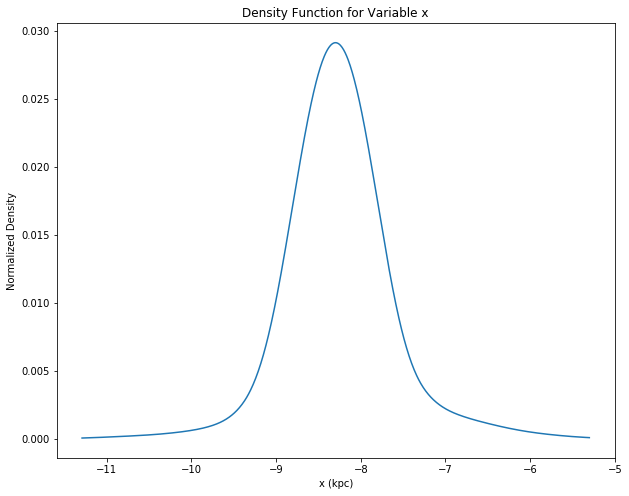

Variable y at Scotts bw


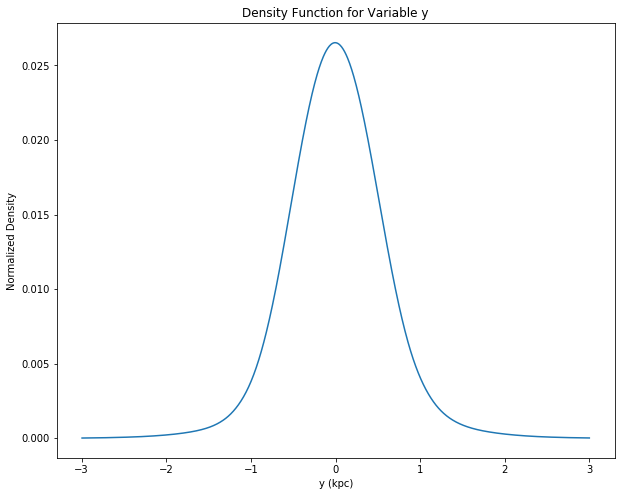

Variable z at Scotts bw


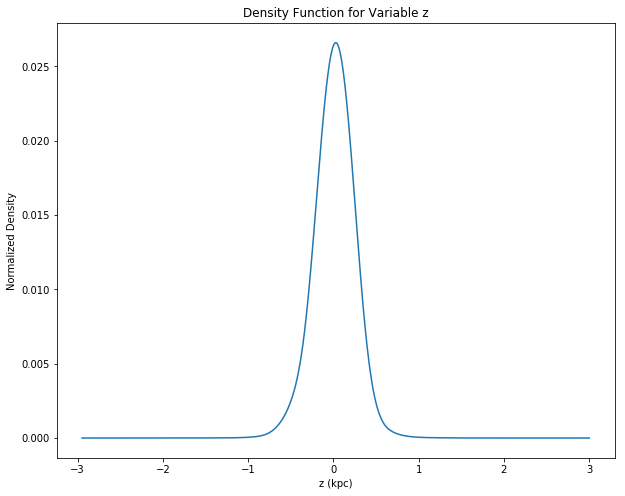

Variable vx at Scotts bw


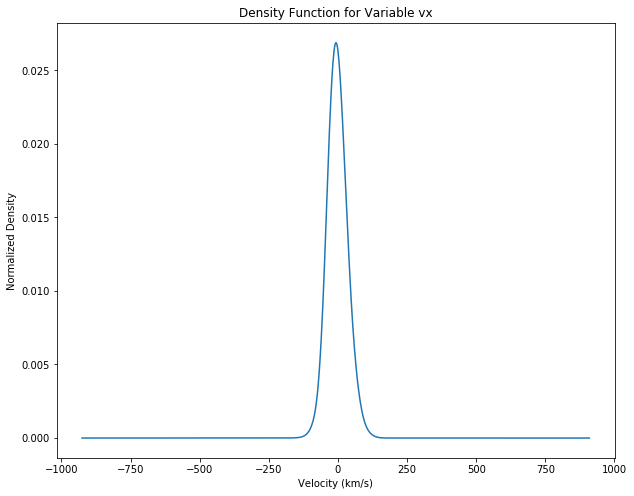

Variable vy at Scotts bw


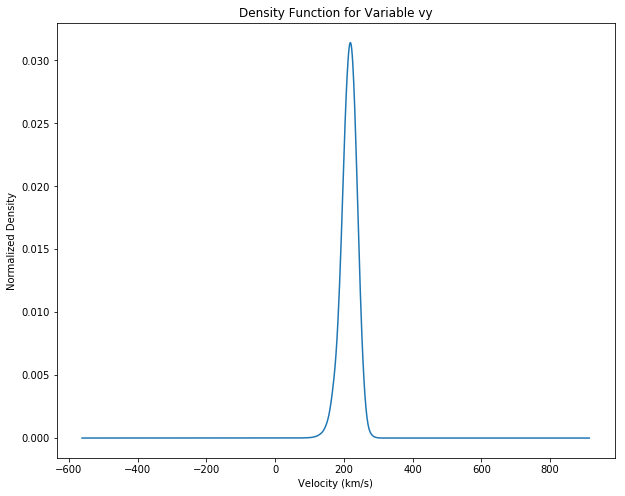

Variable vz at Scotts bw


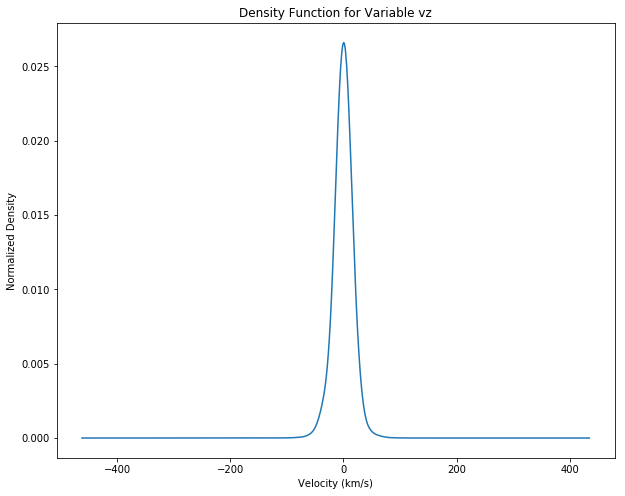

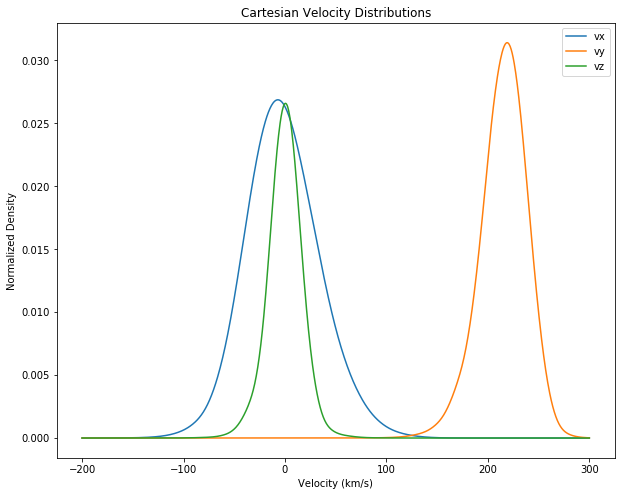

In [35]:
#Creating sample points for each parameter changing
N = 1000

#Mean of each parameter as a Nx1 object
mean_x = np.ones((N, 1))*np.mean(data5[:,0])
mean_y = np.ones((N, 1))*np.mean(data5[:,1])
mean_z = np.ones((N, 1))*np.mean(data5[:,2])
mean_vx = np.ones((N, 1))*np.mean(data5[:,3])
mean_vy = np.ones((N, 1))*np.mean(data5[:,4])
mean_vz = np.ones((N, 1))*np.mean(data5[:,5])

#Generating Nx6 sample points for each varying parameter
#For variable R
x_points = np.linspace(min(data5[:,0]), max(data5[:,0]), N)
x_points = x_points.reshape(-1, 1)
sample_x = np.hstack((x_points, mean_y, mean_z, mean_vx, mean_vy, mean_vz))

#For variable y
y_points = np.linspace(min(data5[:,1]), max(data5[:,1]), N)
y_points = y_points.reshape(-1, 1)
sample_y = np.hstack((mean_x, y_points, mean_z, mean_vx, mean_vy, mean_vz))
                 
#For variable z
z_points = np.linspace(min(data5[:,2]), max(data5[:,2]), N)
z_points = z_points.reshape(-1, 1)
sample_z = np.hstack((mean_x, mean_y, z_points, mean_vx, mean_vy, mean_vz))
                 
#For variable vx
vx_points = np.linspace(min(data5[:,3]), max(data5[:,3]), N)
vx_points = vx_points.reshape(-1, 1)
sample_vx = np.hstack((mean_x, mean_y, mean_z, vx_points, mean_vy, mean_vz))

#For variable vy
vy_points = np.linspace(min(data5[:,4]), max(data5[:,4]), N)
vy_points = vy_points.reshape(-1, 1)
sample_vy = np.hstack((mean_x, mean_y, mean_z, mean_vx, vy_points, mean_vz))
                 
#For variable vz
vz_points = np.linspace(min(data5[:,5]), max(data5[:,5]), N)
vz_points = vz_points.reshape(-1, 1)
sample_vz = np.hstack((mean_x, mean_y, mean_z, mean_vx, mean_vy, vz_points))

#Plots for epsilon = 3.0 kpc
print('Epsilon set to 3.0 kpc')

#Variable x plot
print('Variable x at Scotts bw')
plt.figure(figsize = (10, 8))
xplot_epanechnikov = kde5(sample_x)
plt.plot(x_points, xplot_epanechnikov)
plt.xlabel('x (kpc)')
plt.ylabel('Normalized Density')
plt.title('Density Function for Variable x')
plt.savefig('zscore_cart_variable_x_ep3kpc')
plt.show()

#Variable y plot
print('Variable y at Scotts bw')
plt.figure(figsize = (10, 8))
yplot_epanechnikov = kde5(sample_y)
plt.plot(y_points, yplot_epanechnikov)
plt.xlabel('y (kpc)')
plt.ylabel('Normalized Density')
plt.title('Density Function for Variable y')
plt.savefig('zscore_cart_variable_y_ep3kpc')
plt.show()

#Variable z plot
print('Variable z at Scotts bw')
plt.figure(figsize = (10, 8))
zplot_epanechnikov = kde5(sample_z)
plt.plot(z_points, zplot_epanechnikov)
plt.xlabel('z (kpc)')
plt.ylabel('Normalized Density')
plt.title('Density Function for Variable z')
plt.savefig('zscore_cart_variable_z_ep3kpc')
plt.show()

#Variable vx plot
print('Variable vx at Scotts bw')
plt.figure(figsize = (10, 8))
vxplot_epanechnikov = kde5(sample_vx)
plt.plot(vx_points, vxplot_epanechnikov)
plt.xlabel('Velocity (km/s)')
plt.ylabel('Normalized Density')
plt.title('Density Function for Variable vx')
plt.savefig('zscore_cart_variable_vx_ep3kpc')
plt.show()

#Variable vy plot
print('Variable vy at Scotts bw')
plt.figure(figsize = (10, 8))
vyplot_epanechnikov = kde5(sample_vy)
plt.plot(vy_points, vyplot_epanechnikov)
plt.xlabel('Velocity (km/s)')
plt.ylabel('Normalized Density')
plt.title('Density Function for Variable vy')
plt.savefig('zscore_cart_variable_vy_ep3kpc')
plt.show()

#Variable vz plot
print('Variable vz at Scotts bw')
plt.figure(figsize = (10, 8))
vzplot_epanechnikov = kde5(sample_vz)
plt.plot(vz_points, vzplot_epanechnikov)
plt.xlabel('Velocity (km/s)')
plt.ylabel('Normalized Density')
plt.title('Density Function for Variable vz')
plt.savefig('zscore_cart_variable_vz_ep3kpc')
plt.show()

#For variable vx
vx_points = np.linspace(-200, 300, N)
vx_points = vx_points.reshape(-1, 1)
sample_vx = np.hstack((mean_x, mean_y, mean_z, vx_points, mean_vy, mean_vz))

#For variable vy
vy_points = np.linspace(-200, 300, N)
vy_points = vy_points.reshape(-1, 1)
sample_vy = np.hstack((mean_x, mean_y, mean_z, mean_vx, vy_points, mean_vz))
                 
#For variable vz
vz_points = np.linspace(-200, 300, N)
vz_points = vz_points.reshape(-1, 1)
sample_vz = np.hstack((mean_x, mean_y, mean_z, mean_vx, mean_vy, vz_points))

#Overplotting velocities
plt.figure(figsize = (10, 8))

#Epanechnikov, vx, Scotts
vxplot_epanechnikov = kde5(sample_vx)
plt.plot(vx_points, vxplot_epanechnikov, label='vx')

#Epanechnikov, vy, Scotts
vyplot_epanechnikov = kde5(sample_vy)
plt.plot(vy_points, vyplot_epanechnikov, label='vy')

#Epanechnikov, vz, Scotts
vzplot_epanechnikov = kde5(sample_vz)
plt.plot(vz_points, vzplot_epanechnikov, label='vz')

#Show plot
plt.xlabel('Velocity (km/s)')
plt.ylabel('Normalized Density')
plt.title('Cartesian Velocity Distributions')
plt.legend()
plt.savefig('zscore_cart_velocity_distribution_ep3kpc')
plt.show()

Epsilon set to 4.0 kpc
Variable x at Scotts bw


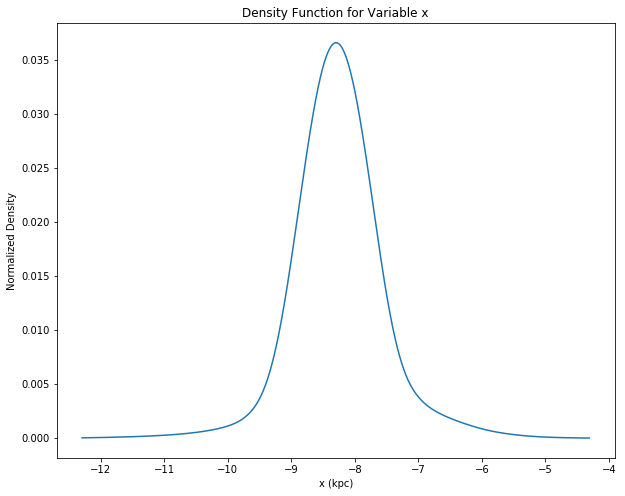

Variable y at Scotts bw


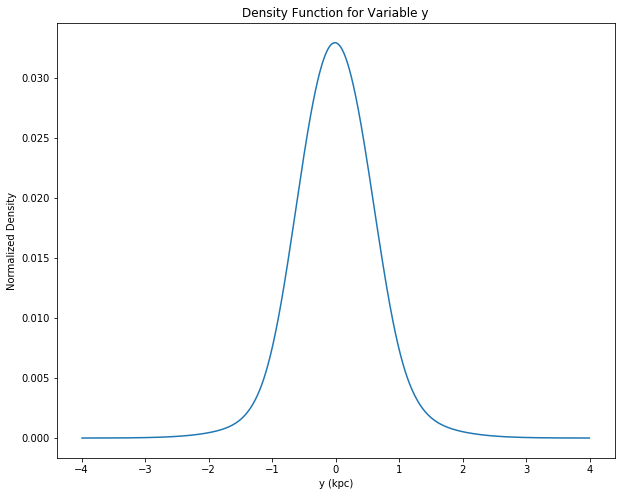

Variable z at Scotts bw


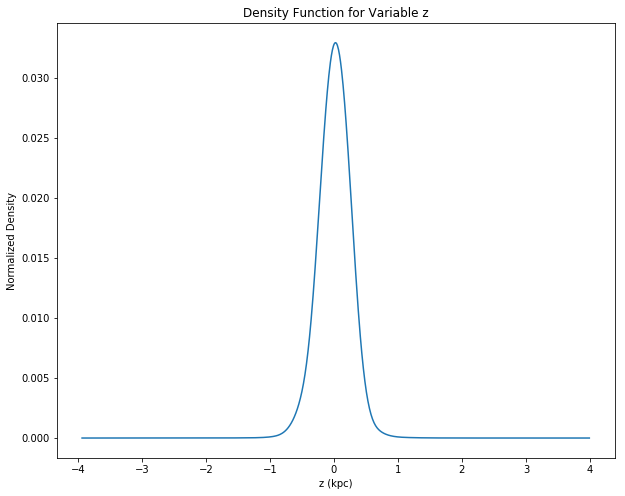

Variable vx at Scotts bw


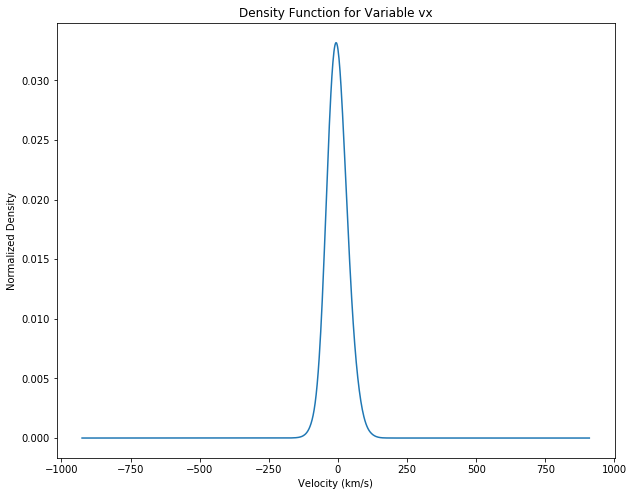

Variable vy at Scotts bw


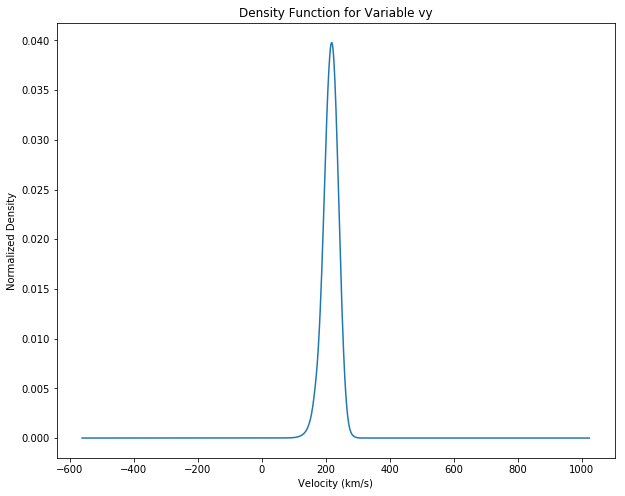

Variable vz at Scotts bw


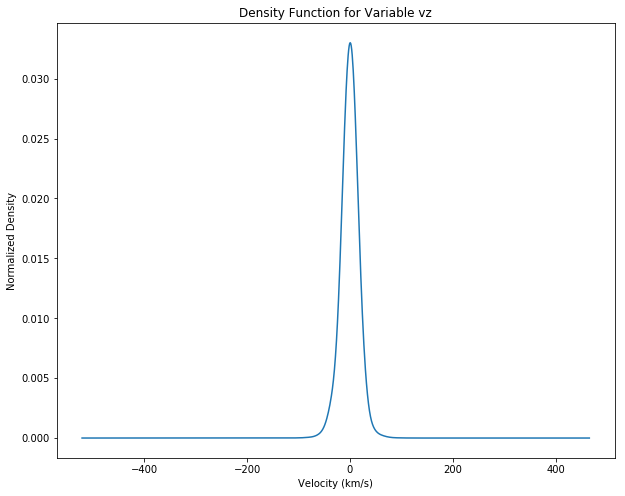

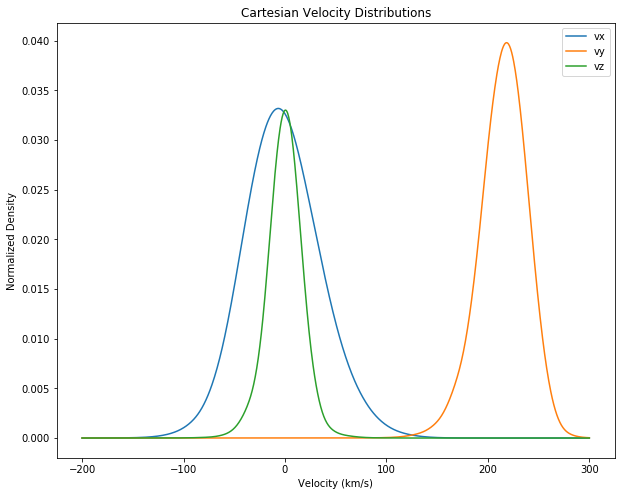

In [36]:
#Creating sample points for each parameter changing
N = 1000

#Mean of each parameter as a Nx1 object
mean_x = np.ones((N, 1))*np.mean(data6[:,0])
mean_y = np.ones((N, 1))*np.mean(data6[:,1])
mean_z = np.ones((N, 1))*np.mean(data6[:,2])
mean_vx = np.ones((N, 1))*np.mean(data6[:,3])
mean_vy = np.ones((N, 1))*np.mean(data6[:,4])
mean_vz = np.ones((N, 1))*np.mean(data6[:,5])

#Generating Nx6 sample points for each varying parameter
#For variable R
x_points = np.linspace(min(data6[:,0]), max(data6[:,0]), N)
x_points = x_points.reshape(-1, 1)
sample_x = np.hstack((x_points, mean_y, mean_z, mean_vx, mean_vy, mean_vz))

#For variable y
y_points = np.linspace(min(data6[:,1]), max(data6[:,1]), N)
y_points = y_points.reshape(-1, 1)
sample_y = np.hstack((mean_x, y_points, mean_z, mean_vx, mean_vy, mean_vz))
                 
#For variable z
z_points = np.linspace(min(data6[:,2]), max(data6[:,2]), N)
z_points = z_points.reshape(-1, 1)
sample_z = np.hstack((mean_x, mean_y, z_points, mean_vx, mean_vy, mean_vz))
                 
#For variable vx
vx_points = np.linspace(min(data6[:,3]), max(data6[:,3]), N)
vx_points = vx_points.reshape(-1, 1)
sample_vx = np.hstack((mean_x, mean_y, mean_z, vx_points, mean_vy, mean_vz))

#For variable vy
vy_points = np.linspace(min(data6[:,4]), max(data6[:,4]), N)
vy_points = vy_points.reshape(-1, 1)
sample_vy = np.hstack((mean_x, mean_y, mean_z, mean_vx, vy_points, mean_vz))
                 
#For variable vz
vz_points = np.linspace(min(data6[:,5]), max(data6[:,5]), N)
vz_points = vz_points.reshape(-1, 1)
sample_vz = np.hstack((mean_x, mean_y, mean_z, mean_vx, mean_vy, vz_points))

#Plots for epsilon = 4.0 kpc
print('Epsilon set to 4.0 kpc')

#Variable x plot
print('Variable x at Scotts bw')
plt.figure(figsize = (10, 8))
xplot_epanechnikov = kde6(sample_x)
plt.plot(x_points, xplot_epanechnikov)
plt.xlabel('x (kpc)')
plt.ylabel('Normalized Density')
plt.title('Density Function for Variable x')
plt.savefig('zscore_cart_variable_x_ep4kpc')
plt.show()

#Variable y plot
print('Variable y at Scotts bw')
plt.figure(figsize = (10, 8))
yplot_epanechnikov = kde6(sample_y)
plt.plot(y_points, yplot_epanechnikov)
plt.xlabel('y (kpc)')
plt.ylabel('Normalized Density')
plt.title('Density Function for Variable y')
plt.savefig('zscore_cart_variable_y_ep4kpc')
plt.show()

#Variable z plot
print('Variable z at Scotts bw')
plt.figure(figsize = (10, 8))
zplot_epanechnikov = kde6(sample_z)
plt.plot(z_points, zplot_epanechnikov)
plt.xlabel('z (kpc)')
plt.ylabel('Normalized Density')
plt.title('Density Function for Variable z')
plt.savefig('zscore_cart_variable_z_ep4kpc')
plt.show()

#Variable vx plot
print('Variable vx at Scotts bw')
plt.figure(figsize = (10, 8))
vxplot_epanechnikov = kde6(sample_vx)
plt.plot(vx_points, vxplot_epanechnikov)
plt.xlabel('Velocity (km/s)')
plt.ylabel('Normalized Density')
plt.title('Density Function for Variable vx')
plt.savefig('zscore_cart_variable_vx_ep4kpc')
plt.show()

#Variable vy plot
print('Variable vy at Scotts bw')
plt.figure(figsize = (10, 8))
vyplot_epanechnikov = kde6(sample_vy)
plt.plot(vy_points, vyplot_epanechnikov)
plt.xlabel('Velocity (km/s)')
plt.ylabel('Normalized Density')
plt.title('Density Function for Variable vy')
plt.savefig('zscore_cart_variable_vy_ep4kpc')
plt.show()

#Variable vz plot
print('Variable vz at Scotts bw')
plt.figure(figsize = (10, 8))
vzplot_epanechnikov = kde6(sample_vz)
plt.plot(vz_points, vzplot_epanechnikov)
plt.xlabel('Velocity (km/s)')
plt.ylabel('Normalized Density')
plt.title('Density Function for Variable vz')
plt.savefig('zscore_cart_variable_vz_ep4kpc')
plt.show()

#For variable vx
vx_points = np.linspace(-200, 300, N)
vx_points = vx_points.reshape(-1, 1)
sample_vx = np.hstack((mean_x, mean_y, mean_z, vx_points, mean_vy, mean_vz))

#For variable vy
vy_points = np.linspace(-200, 300, N)
vy_points = vy_points.reshape(-1, 1)
sample_vy = np.hstack((mean_x, mean_y, mean_z, mean_vx, vy_points, mean_vz))
                 
#For variable vz
vz_points = np.linspace(-200, 300, N)
vz_points = vz_points.reshape(-1, 1)
sample_vz = np.hstack((mean_x, mean_y, mean_z, mean_vx, mean_vy, vz_points))

#Overplotting velocities
plt.figure(figsize = (10, 8))

#Epanechnikov, vx, Scotts
vxplot_epanechnikov = kde6(sample_vx)
plt.plot(vx_points, vxplot_epanechnikov, label='vx')

#Epanechnikov, vy, Scotts
vyplot_epanechnikov = kde6(sample_vy)
plt.plot(vy_points, vyplot_epanechnikov, label='vy')

#Epanechnikov, vz, Scotts
vzplot_epanechnikov = kde6(sample_vz)
plt.plot(vz_points, vzplot_epanechnikov, label='vz')

#Show plot
plt.xlabel('Velocity (km/s)')
plt.ylabel('Normalized Density')
plt.title('Cartesian Velocity Distributions')
plt.legend()
plt.savefig('zscore_cart_velocity_distribution_ep4kpc')
plt.show()

Full gaia rv set
Variable x at Scotts bw


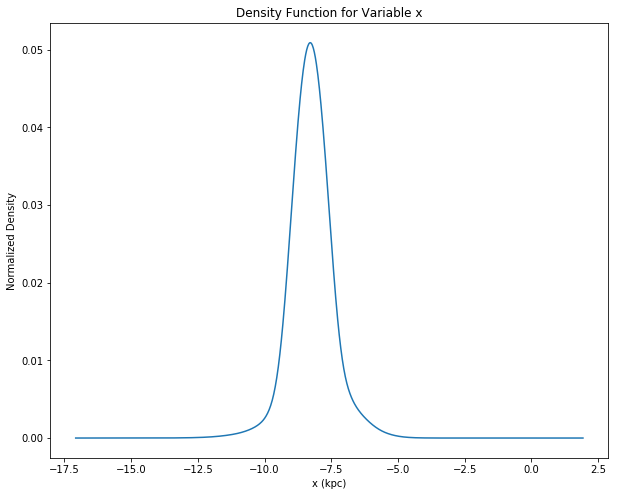

Variable y at Scotts bw


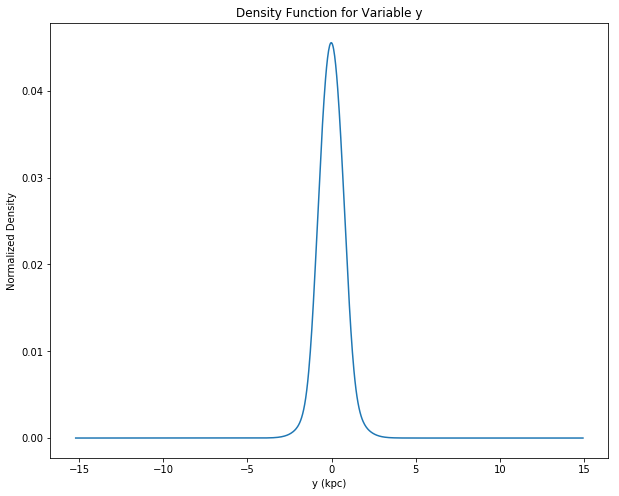

Variable z at Scotts bw


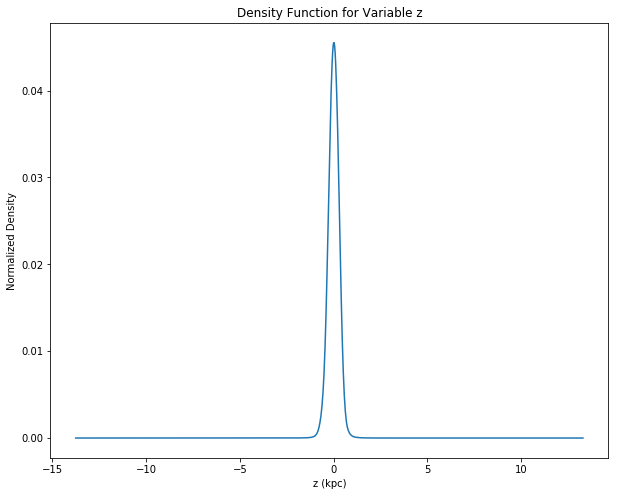

Variable vx at Scotts bw


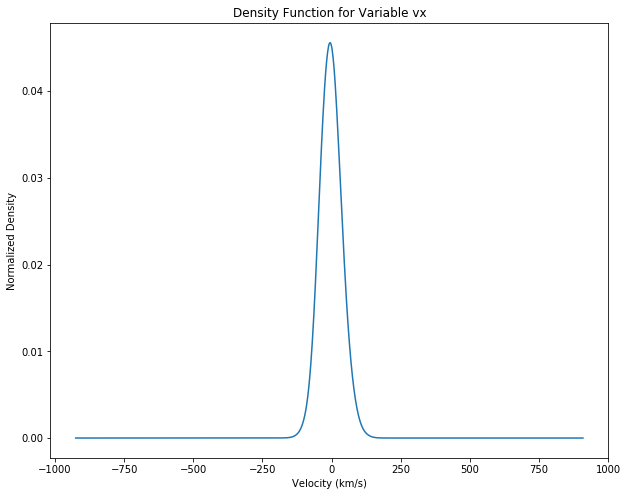

Variable vy at Scotts bw


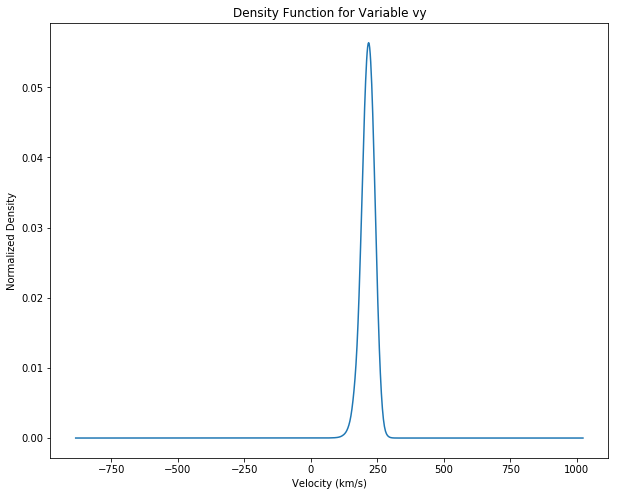

Variable vz at Scotts bw


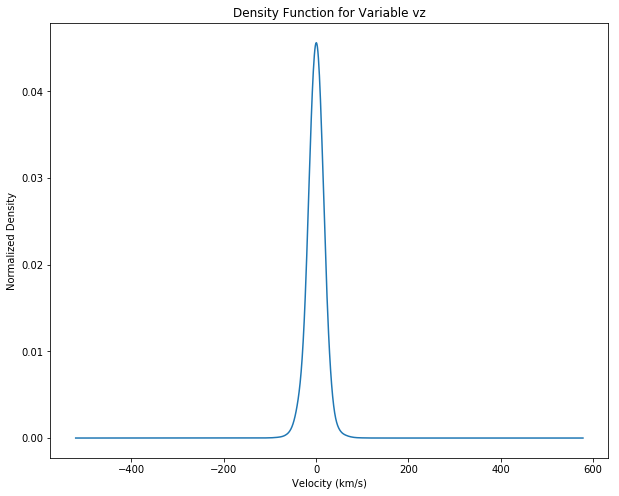

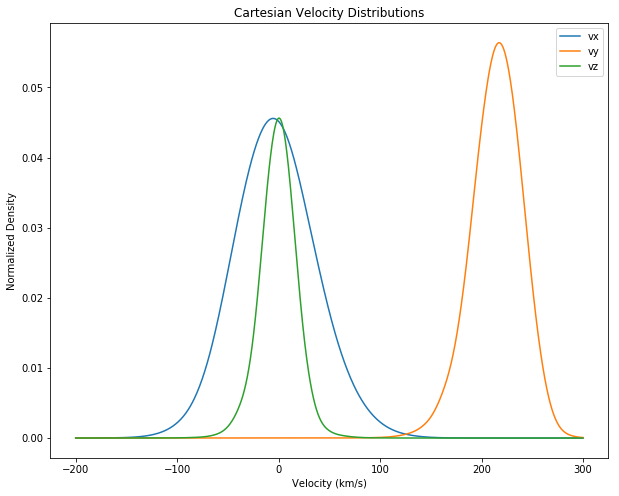

In [37]:
#Creating sample points for each parameter changing
N = 1000

#Mean of each parameter as a Nx1 object
mean_x = np.ones((N, 1))*np.mean(data7[:,0])
mean_y = np.ones((N, 1))*np.mean(data7[:,1])
mean_z = np.ones((N, 1))*np.mean(data7[:,2])
mean_vx = np.ones((N, 1))*np.mean(data7[:,3])
mean_vy = np.ones((N, 1))*np.mean(data7[:,4])
mean_vz = np.ones((N, 1))*np.mean(data7[:,5])

#Generating Nx6 sample points for each varying parameter
#For variable R
x_points = np.linspace(min(data7[:,0]), max(data7[:,0]), N)
x_points = x_points.reshape(-1, 1)
sample_x = np.hstack((x_points, mean_y, mean_z, mean_vx, mean_vy, mean_vz))

#For variable y
y_points = np.linspace(min(data7[:,1]), max(data7[:,1]), N)
y_points = y_points.reshape(-1, 1)
sample_y = np.hstack((mean_x, y_points, mean_z, mean_vx, mean_vy, mean_vz))
                 
#For variable z
z_points = np.linspace(min(data7[:,2]), max(data7[:,2]), N)
z_points = z_points.reshape(-1, 1)
sample_z = np.hstack((mean_x, mean_y, z_points, mean_vx, mean_vy, mean_vz))
                 
#For variable vx
vx_points = np.linspace(min(data7[:,3]), max(data7[:,3]), N)
vx_points = vx_points.reshape(-1, 1)
sample_vx = np.hstack((mean_x, mean_y, mean_z, vx_points, mean_vy, mean_vz))

#For variable vy
vy_points = np.linspace(min(data7[:,4]), max(data7[:,4]), N)
vy_points = vy_points.reshape(-1, 1)
sample_vy = np.hstack((mean_x, mean_y, mean_z, mean_vx, vy_points, mean_vz))
                 
#For variable vz
vz_points = np.linspace(min(data7[:,5]), max(data7[:,5]), N)
vz_points = vz_points.reshape(-1, 1)
sample_vz = np.hstack((mean_x, mean_y, mean_z, mean_vx, mean_vy, vz_points))

#Plots for full gaia rv set
print('Full gaia rv set')

#Variable x plot
print('Variable x at Scotts bw')
plt.figure(figsize = (10, 8))
xplot_epanechnikov = kde7(sample_x)
plt.plot(x_points, xplot_epanechnikov)
plt.xlabel('x (kpc)')
plt.ylabel('Normalized Density')
plt.title('Density Function for Variable x')
plt.savefig('zscore_cart_variable_x_full')
plt.show()

#Variable y plot
print('Variable y at Scotts bw')
plt.figure(figsize = (10, 8))
yplot_epanechnikov = kde7(sample_y)
plt.plot(y_points, yplot_epanechnikov)
plt.xlabel('y (kpc)')
plt.ylabel('Normalized Density')
plt.title('Density Function for Variable y')
plt.savefig('zscore_cart_variable_y_full')
plt.show()

#Variable z plot
print('Variable z at Scotts bw')
plt.figure(figsize = (10, 8))
zplot_epanechnikov = kde7(sample_z)
plt.plot(z_points, zplot_epanechnikov)
plt.xlabel('z (kpc)')
plt.ylabel('Normalized Density')
plt.title('Density Function for Variable z')
plt.savefig('zscore_cart_variable_z_full')
plt.show()

#Variable vx plot
print('Variable vx at Scotts bw')
plt.figure(figsize = (10, 8))
vxplot_epanechnikov = kde7(sample_vx)
plt.plot(vx_points, vxplot_epanechnikov)
plt.xlabel('Velocity (km/s)')
plt.ylabel('Normalized Density')
plt.title('Density Function for Variable vx')
plt.savefig('zscore_cart_variable_vx_full')
plt.show()

#Variable vy plot
print('Variable vy at Scotts bw')
plt.figure(figsize = (10, 8))
vyplot_epanechnikov = kde7(sample_vy)
plt.plot(vy_points, vyplot_epanechnikov)
plt.xlabel('Velocity (km/s)')
plt.ylabel('Normalized Density')
plt.title('Density Function for Variable vy')
plt.savefig('zscore_cart_variable_vy_full')
plt.show()

#Variable vz plot
print('Variable vz at Scotts bw')
plt.figure(figsize = (10, 8))
vzplot_epanechnikov = kde7(sample_vz)
plt.plot(vz_points, vzplot_epanechnikov)
plt.xlabel('Velocity (km/s)')
plt.ylabel('Normalized Density')
plt.title('Density Function for Variable vz')
plt.savefig('zscore_cart_variable_vz_full')
plt.show()

#For variable vx
vx_points = np.linspace(-200, 300, N)
vx_points = vx_points.reshape(-1, 1)
sample_vx = np.hstack((mean_x, mean_y, mean_z, vx_points, mean_vy, mean_vz))

#For variable vy
vy_points = np.linspace(-200, 300, N)
vy_points = vy_points.reshape(-1, 1)
sample_vy = np.hstack((mean_x, mean_y, mean_z, mean_vx, vy_points, mean_vz))
                 
#For variable vz
vz_points = np.linspace(-200, 300, N)
vz_points = vz_points.reshape(-1, 1)
sample_vz = np.hstack((mean_x, mean_y, mean_z, mean_vx, mean_vy, vz_points))

#Overplotting velocities
plt.figure(figsize = (10, 8))

#Epanechnikov, vx, Scotts
vxplot_epanechnikov = kde7(sample_vx)
plt.plot(vx_points, vxplot_epanechnikov, label='vx')

#Epanechnikov, vy, Scotts
vyplot_epanechnikov = kde7(sample_vy)
plt.plot(vy_points, vyplot_epanechnikov, label='vy')

#Epanechnikov, vz, Scotts
vzplot_epanechnikov = kde7(sample_vz)
plt.plot(vz_points, vzplot_epanechnikov, label='vz')

#Show plot
plt.xlabel('Velocity (km/s)')
plt.ylabel('Normalized Density')
plt.title('Cartesian Velocity Distributions')
plt.legend()
plt.savefig('zscore_cart_velocity_distribution_full')
plt.show()